In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %run 'C:\Users\JT\OneDrive - UNIR\Certificaciones\IronHack\IH-Labs\Metodosmetodos.py'

In [38]:
def la_funsion_que_retorna_solo_2_palabras(stringu):
    x = stringu.split(' ')[:2]
    return x

frase = 'Nintendo develops great games'
a,b = la_funsion_que_retorna_solo_2_palabras(frase)
print(a,b)

Nintendo develops


In [39]:
energy_df = pd.read_csv(r"Energy in Spain/energy_dataset.csv")
weather_df = pd.read_csv(r"Energy in Spain/weather_features.csv")


In [40]:
energy_df.shape, weather_df.shape

((35064, 29), (178396, 17))

In [41]:
def snake_case(data):
    lower_case_columns = []
    for columns in data.columns:
        # if ' ' in columns:
        #     columns = columns.replace(' ', '_')   # This is the same but iterating
        lower_case_columns.append(columns.lower())
        
    data.columns = lower_case_columns
    data.columns = data.columns.str.replace(' ','_')

In [42]:
snake_case(energy_df)
snake_case(weather_df)

In [43]:
def print_columns(data):
    for column in data.columns:
        print(column,data[column].hist(bins=10))
        plt.show()

In [44]:
energy_df.columns

Index(['time', 'generation_biomass', 'generation_fossil_brown_coal/lignite',
       'generation_fossil_coal-derived_gas', 'generation_fossil_gas',
       'generation_fossil_hard_coal', 'generation_fossil_oil',
       'generation_fossil_oil_shale', 'generation_fossil_peat',
       'generation_geothermal', 'generation_hydro_pumped_storage_aggregated',
       'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run-of-river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_marine',
       'generation_nuclear', 'generation_other', 'generation_other_renewable',
       'generation_solar', 'generation_waste', 'generation_wind_offshore',
       'generation_wind_onshore', 'forecast_solar_day_ahead',
       'forecast_wind_offshore_eday_ahead', 'forecast_wind_onshore_day_ahead',
       'total_load_forecast', 'total_load_actual', 'price_day_ahead',
       'price_actual'],
      dtype='object')

I am going to look for columns to drop with useless information

In [45]:
energy_df.head(2)

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.1,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.1,64.92


In [46]:
weather_df['city_name'].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [47]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


I am going to convert the physical variables into international system units

In [48]:
# Kelvin to Celsius
weather_df['temp'] = weather_df['temp'] - 273.15
weather_df['temp_min'] = weather_df['temp_min'] - 273.15
weather_df['temp_max'] = weather_df['temp_max'] - 273.15
# The pressure is in mili bares, therefore we will convert it to bars
weather_df['pressure'] = weather_df['pressure'] / 1000
# Wind speed is in meters per second
# Wind direction is in degrees

The plan is to concatenate both dataframes into one big df through time column
+ First of all we need to rename the time columns so the are called the same way
+ When they share the name we can merge both dataframes 

In [49]:
weather_df = weather_df.rename(columns={"dt_iso":"time"})

In [50]:
weather_df['time'] = weather_df['time'].astype(object)
energy_df['time'] = energy_df['time'].astype(object)

Taking into account the initial shape of both datasets we will have to make a left join in order to have matching dimensions

The expected dimensions will be (35064, 45)

In [51]:
Madrid_weather_df = weather_df[weather_df['city_name'] == 'Madrid']

In [52]:
# weather_df[weather_df['time']<='2015-01-06'].tail(20)

In [53]:
energy_df[energy_df['time']<='2015-01-06'].tail(20)

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
100,2015-01-05 04:00:00+01:00,334.0,0.0,0.0,4390.0,2573.0,308.0,0.0,0.0,0.0,...,155.0,0.0,8348.0,386.0,NaN,8397.0,21369.0,20778.0,30.60,58.04
101,2015-01-05 05:00:00+01:00,338.0,0.0,0.0,4108.0,2551.0,300.0,0.0,0.0,0.0,...,153.0,0.0,8526.0,277.0,NaN,8437.0,20723.0,20309.0,30.60,59.57
102,2015-01-05 06:00:00+01:00,341.0,0.0,0.0,4396.0,2351.0,291.0,0.0,0.0,0.0,...,152.0,0.0,8518.0,161.0,NaN,8660.0,20498.0,20252.0,30.60,69.73
103,2015-01-05 07:00:00+01:00,343.0,0.0,0.0,4227.0,2202.0,301.0,0.0,0.0,0.0,...,143.0,0.0,8263.0,195.0,NaN,8285.0,19736.0,19964.0,30.00,72.97
104,2015-01-05 08:00:00+01:00,345.0,0.0,0.0,4017.0,2138.0,317.0,0.0,0.0,0.0,...,143.0,0.0,8326.0,685.0,NaN,8286.0,19970.0,20796.0,30.60,77.92
105,2015-01-05 09:00:00+01:00,369.0,0.0,0.0,4243.0,2239.0,331.0,0.0,0.0,0.0,...,140.0,0.0,8046.0,1669.0,NaN,8122.0,21590.0,22478.0,35.30,79.59
106,2015-01-05 10:00:00+01:00,374.0,0.0,0.0,3993.0,2545.0,337.0,0.0,0.0,0.0,...,140.0,0.0,8439.0,3011.0,NaN,8214.0,22987.0,23834.0,35.20,81.75
107,2015-01-05 11:00:00+01:00,376.0,0.0,0.0,3900.0,2422.0,333.0,0.0,0.0,0.0,...,155.0,0.0,9131.0,3344.0,NaN,8921.0,23271.0,24429.0,35.40,80.82
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3932.0,NaN,9258.0,23209.0,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4236.0,NaN,9156.0,23725.0,NaN,36.80,73.95


In [54]:
Madrid_weather_df.reset_index(inplace=True)
Madrid_weather_df.drop(['index'],axis=1,inplace=True)

C:\Users\JT\AppData\Local\Temp\ipykernel_15340\1165499661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Madrid_weather_df.drop(['index'],axis=1,inplace=True)


In [55]:
# Madrid_weather_df.drop(['index'],axis=1,inplace=True)

In [56]:
X=pd.merge(energy_df, Madrid_weather_df, how='inner', left_index=True, right_index=True)

In [57]:
X.columns

Index(['time_x', 'generation_biomass', 'generation_fossil_brown_coal/lignite',
       'generation_fossil_coal-derived_gas', 'generation_fossil_gas',
       'generation_fossil_hard_coal', 'generation_fossil_oil',
       'generation_fossil_oil_shale', 'generation_fossil_peat',
       'generation_geothermal', 'generation_hydro_pumped_storage_aggregated',
       'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run-of-river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_marine',
       'generation_nuclear', 'generation_other', 'generation_other_renewable',
       'generation_solar', 'generation_waste', 'generation_wind_offshore',
       'generation_wind_onshore', 'forecast_solar_day_ahead',
       'forecast_wind_offshore_eday_ahead', 'forecast_wind_onshore_day_ahead',
       'total_load_forecast', 'total_load_actual', 'price_day_ahead',
       'price_actual', 'time_y', 'city_name', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', '

In [58]:
X.shape

(35064, 46)

In [59]:
X.isna().sum()

time_x                                             0
generation_biomass                                19
generation_fossil_brown_coal/lignite              18
generation_fossil_coal-derived_gas                18
generation_fossil_gas                             18
generation_fossil_hard_coal                       18
generation_fossil_oil                             19
generation_fossil_oil_shale                       18
generation_fossil_peat                            18
generation_geothermal                             18
generation_hydro_pumped_storage_aggregated     35064
generation_hydro_pumped_storage_consumption       19
generation_hydro_run-of-river_and_poundage        19
generation_hydro_water_reservoir                  18
generation_marine                                 19
generation_nuclear                                17
generation_other                                  18
generation_other_renewable                        18
generation_solar                              

Time column is being duplicated, therefore I am dropping one of them and renaming the other

In [60]:
X = X.rename(columns={"time_x":"time"})
X.drop(['time_y'], axis=1,inplace=True)

In [61]:
X.head(1)

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n


It seems that generation_fossil_coal-derived_gas, generation_fossil_oil_shale, generation_fossil_peat, generation_geothermal, generation_hydro_pumped_storage_aggregated, generation_marine, generation_wind_offshore, forecast_wind_offshore_eday_ahead, rain_1h, rain_3h, snow_3h  are full of 0´s and Nan´s. I will drop them.

Function to look for empty columns that does not add any information

In [62]:
# for x in X.columns:
#     print(x, X[x].isna().sum())

In [63]:
X.drop(['generation_fossil_coal-derived_gas'],axis=1,inplace=True)
X.drop(['generation_fossil_oil_shale'],axis=1,inplace=True)
X.drop(['generation_fossil_peat'],axis=1,inplace=True)
X.drop(['generation_geothermal'],axis=1,inplace=True)
# X.drop(['generation_hydro_pumped_storage_aggregated'],axis=1,inplace=True)
X.drop(['generation_marine'],axis=1,inplace=True)
X.drop(['generation_wind_offshore'],axis=1,inplace=True)
X.drop(['forecast_solar_day_ahead'],axis=1,inplace=True) 
X.drop(['temp_min'],axis=1,inplace=True)
X.drop(['temp_max'],axis=1,inplace=True)
X.drop(['forecast_wind_onshore_day_ahead'],axis=1,inplace=True)
X.drop(['total_load_forecast'],axis=1,inplace=True)
X.drop(['forecast_wind_offshore_eday_ahead'],axis=1,inplace=True)
X.drop(['rain_1h'],axis=1,inplace=True)
X.drop(['rain_3h'],axis=1,inplace=True)
X.drop(['snow_3h'],axis=1,inplace=True)
X.drop(['generation_hydro_pumped_storage_aggregated'],axis=1,inplace=True)
X.drop(['weather_icon'],axis=1,inplace=True)

In [64]:
X.dropna(inplace=True)

I have decided to drop the city_name column due to merging both dataframes makes that the only city available is Valencia. Therefore it will be a prediction of the weather of Valencia.
Visca Valensia.

In [65]:
# X.wind_speed.value_counts()

In [66]:
X.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,city_name,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,Madrid,-5.825,0.971,63,1,309,0,800,clear,sky is clear
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,Madrid,-5.825,0.971,63,1,309,0,800,clear,sky is clear
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear


In [67]:
X.temp.max(), X.temp.min()

(40.18000000000001, -9.017999999999972)

In [68]:
X.dtypes

time                                            object
generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run-of-river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation_solar                               float64
generation_waste                               float64
generation_wind_onshore                        float64
total_load_actual                              float64
price_day_ahead                                float64
price_actual                                   float64
city_name 

In [69]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(object)

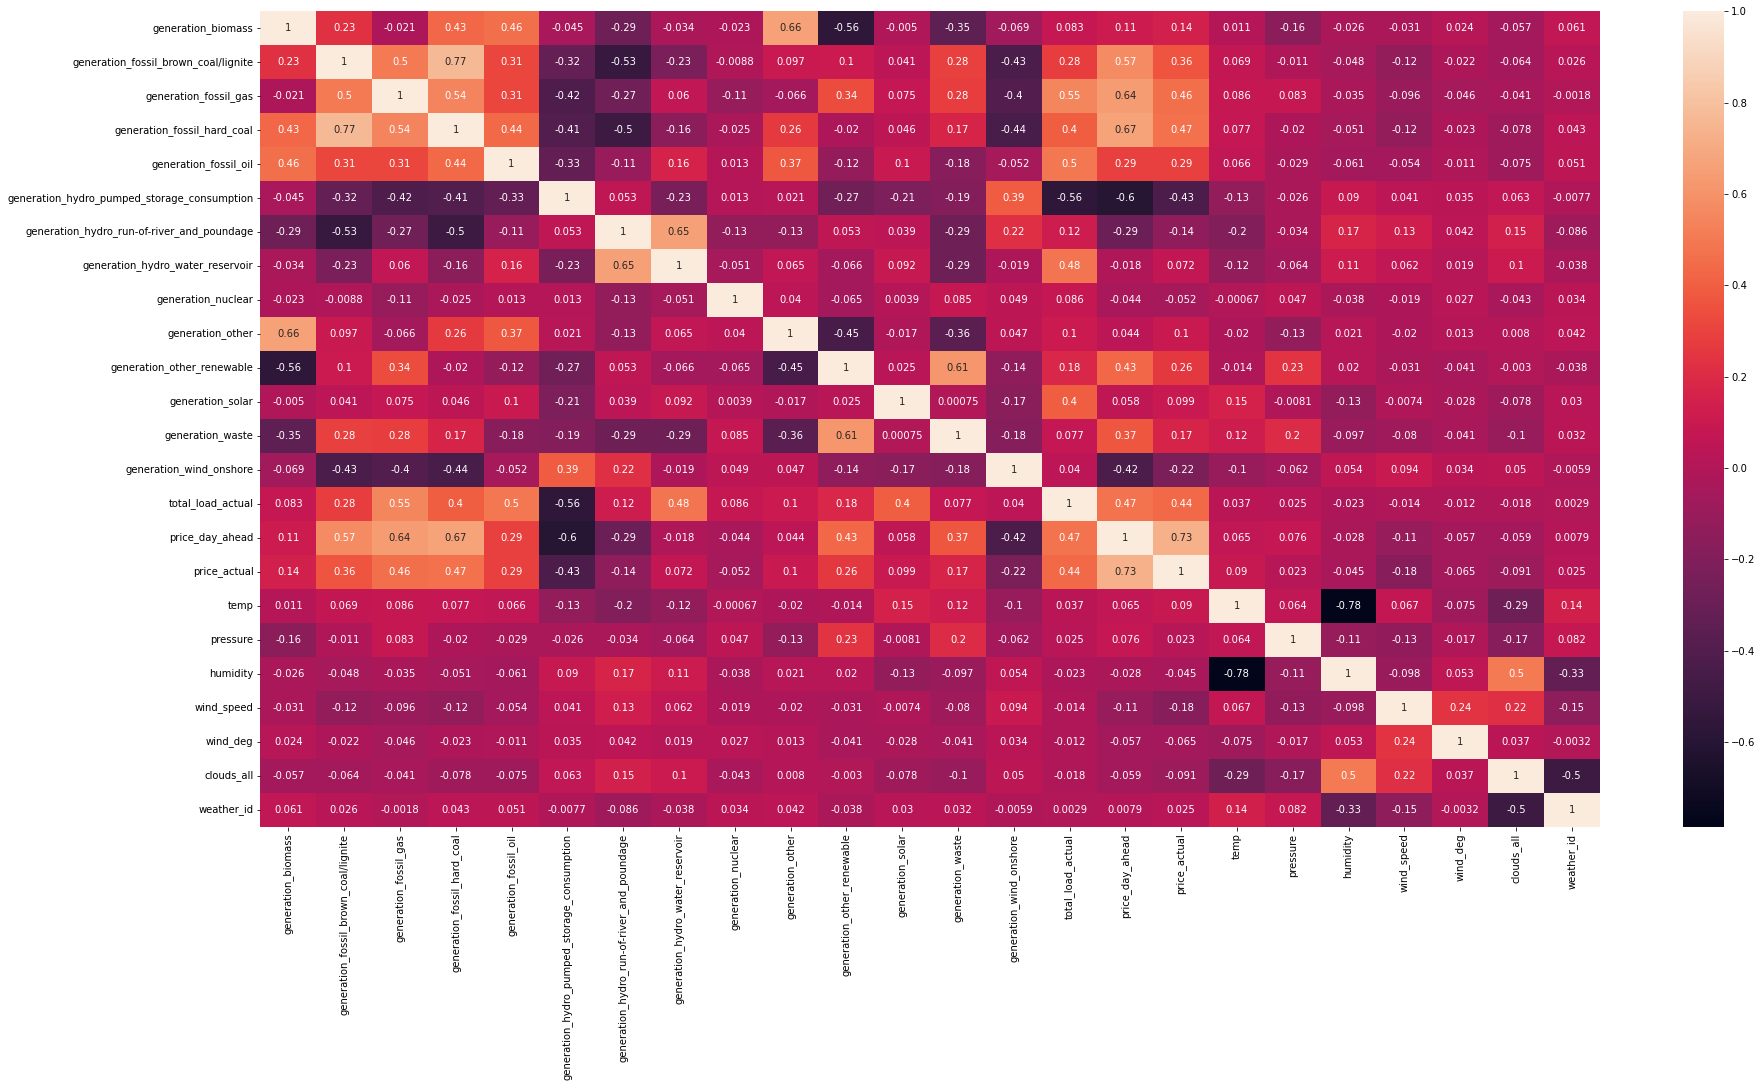

In [70]:
plt.figure(figsize=(30,15))
correlations_matrix = X_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [71]:
X.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,city_name,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,Madrid,-5.825,0.971,63,1,309,0,800,clear,sky is clear
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,Madrid,-5.825,0.971,63,1,309,0,800,clear,sky is clear
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,Madrid,-6.964,0.971,64,1,273,0,800,clear,sky is clear


In [75]:
X.to_excel('clean_data.xlsx',index=False)
X.to_csv('clean_data.csv',index=False)

In [74]:
X.dtypes

time                                            object
generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run-of-river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation_solar                               float64
generation_waste                               float64
generation_wind_onshore                        float64
total_load_actual                              float64
price_day_ahead                                float64
price_actual                                   float64
city_name 